## **differentially expressed genes**

<ipython-input-4-8c15df947993>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['adjusted_p_value'] = results_df['p-value'] # Assuming 'p-value' column represents adjusted p-values. Please update this based on the actual column name.


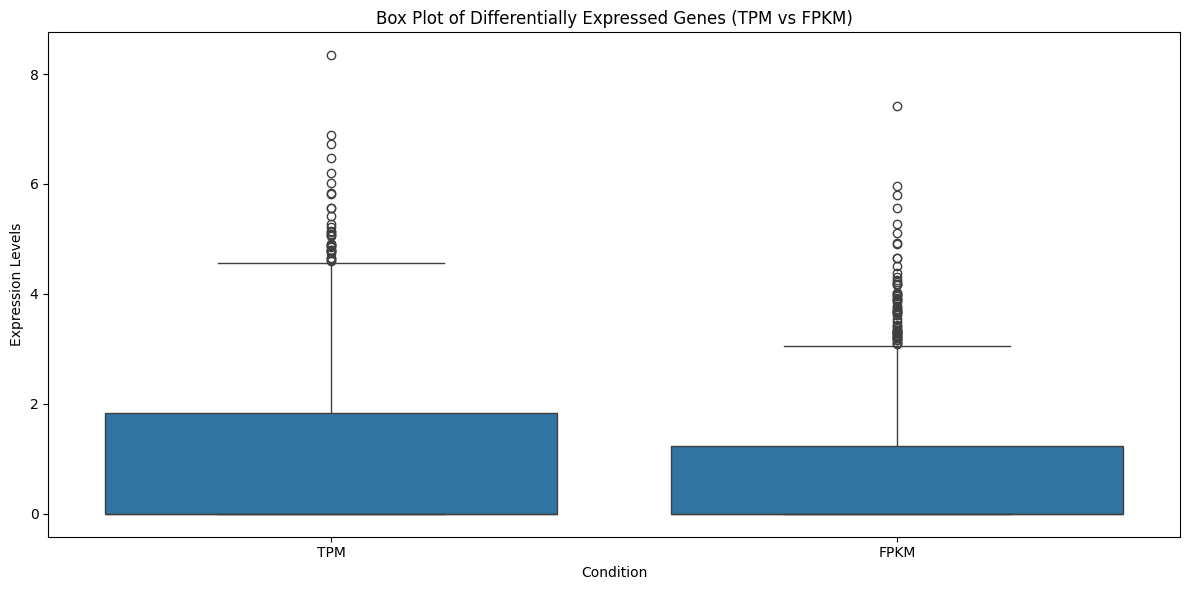

Box plot saved as /content/drive/MyDrive/project/box_plot_differentially_expressed_genes.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
file_path = '/content/file.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Select relevant columns for analysis
expression_data = df[['Gene ID', 'TPM', 'FPKM']]

# Perform the previous differential expression analysis if needed
# Here you might already have the results_df from previous analysis

# Assuming results_df contains significant genes and their Gene IDs
# ----> Load or define results_df here <----

# Assuming your 'df' DataFrame contains the necessary information,
# we'll use it as a replacement for 'results_df' for this example.
# Please update if your 'results_df' has a different structure.
results_df = df[['Gene ID', 'p-value']]
results_df['adjusted_p_value'] = results_df['p-value'] # Assuming 'p-value' column represents adjusted p-values. Please update this based on the actual column name.

significant_genes = results_df[results_df['adjusted_p_value'] < 0.05]['Gene ID']

# Filter the original expression data for significant genes
significant_expression_data = expression_data[expression_data['Gene ID'].isin(significant_genes)]

# Melt the DataFrame for seaborn
melted_data = significant_expression_data.melt(id_vars='Gene ID', value_vars=['TPM', 'FPKM'], var_name='Condition', value_name='Expression')

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Condition', y='Expression', data=melted_data)
plt.title('Box Plot of Differentially Expressed Genes (TPM vs FPKM)')
plt.xlabel('Condition')
plt.ylabel('Expression Levels')
plt.tight_layout()

plt.savefig(boxplot_file_path)

plt.show()
print(f"Box plot saved as {boxplot_file_path}")